### 1. EM算法求解GMM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from utils import plot_mixture

In [2]:
# 1. 生成数据
mu = np.array([-1,4])
std = np.array([1,1.5])
w = np.array([0.7,0.3])
N = 3000
# 2. 采样
Y = []
Z = []
for j in range(N):
    cls = np.random.choice(len(w), p=w)
    y_j = np.random.normal(loc=mu[cls],scale=std[cls])
    Y.append(y_j)
Y = np.array(Y)

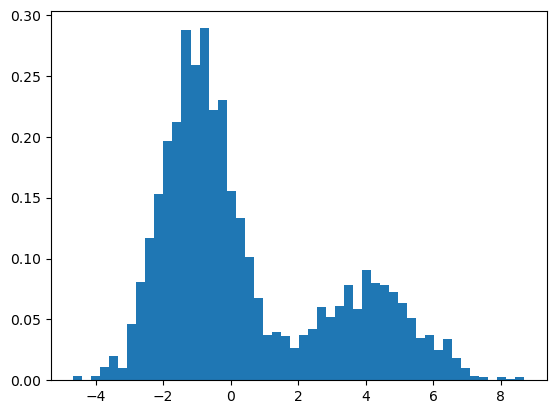

In [3]:
plt.hist(Y, bins=50, density=True)
plt.show()

In [4]:
# 3. EM
# (1) 初始化
mu0 = np.random.choice(Y, size=len(w))
std0 = np.array([1,1])
w0 = np.array([0.5,0.5])
for iter in range(30):
    print(f'Iteration {iter}: mu1 = {mu0[0]:.3f}, std1 = {std0[0]:.3f}, mu2 = {mu0[1]:.3f}, std2 = {std0[1]:.3f}, '  
              f'w1 = {w0[0]:.3f}, w2 = {w0[1]:.3f}') 
    # (2) E-step
    responsibility = []
    for k in range(len(w0)):
        responsibility.append(norm(mu0[k], std0[k]).pdf(Y) * w0[k])
    norm_responsibility = np.array(responsibility)/np.sum(responsibility, axis=0) # shape: (k, N)
    # (3) M-step
    mu_new = []
    std_new = []
    w_new = []
    for k_m in range(len(w0)):
        mu_k = np.sum(norm_responsibility[k_m,:]*Y)/np.sum(norm_responsibility[k_m,:])
        std_k = np.sqrt(np.sum(norm_responsibility[k_m,:]*(Y-mu_k)**2)/np.sum(norm_responsibility[k_m,:]))
        w_k = np.sum(norm_responsibility[k_m,:])/N
        mu_new.append(mu_k)
        std_new.append(std_k)
        w_new.append(w_k)
    mu_new = np.array(mu_new)
    std_new = np.array(std_new)
    w_new = np.array(w_new)
    # (4) 更新
    mu0 = mu_new
    std0 = std_new
    w0 = w_new



Iteration 0: mu1 = -0.073, std1 = 1.000, mu2 = -2.039, std2 = 1.000, w1 = 0.500, w2 = 0.500
Iteration 1: mu1 = 1.566, std1 = 2.488, mu2 = -1.635, std2 = 0.814, w1 = 0.657, w2 = 0.343
Iteration 2: mu1 = 1.650, std1 = 2.606, mu2 = -1.405, std2 = 0.764, w1 = 0.613, w2 = 0.387
Iteration 3: mu1 = 1.792, std1 = 2.656, mu2 = -1.292, std2 = 0.761, w1 = 0.571, w2 = 0.429
Iteration 4: mu1 = 1.939, std1 = 2.673, mu2 = -1.229, std2 = 0.776, w1 = 0.535, w2 = 0.465
Iteration 5: mu1 = 2.082, std1 = 2.668, mu2 = -1.193, std2 = 0.798, w1 = 0.507, w2 = 0.493
Iteration 6: mu1 = 2.219, std1 = 2.646, mu2 = -1.172, std2 = 0.819, w1 = 0.483, w2 = 0.517
Iteration 7: mu1 = 2.350, std1 = 2.612, mu2 = -1.160, std2 = 0.839, w1 = 0.464, w2 = 0.536
Iteration 8: mu1 = 2.474, std1 = 2.570, mu2 = -1.152, std2 = 0.857, w1 = 0.447, w2 = 0.553
Iteration 9: mu1 = 2.592, std1 = 2.521, mu2 = -1.146, std2 = 0.872, w1 = 0.432, w2 = 0.568
Iteration 10: mu1 = 2.705, std1 = 2.467, mu2 = -1.142, std2 = 0.885, w1 = 0.418, w2 = 0.5

/Users/cheung/anaconda3/envs/RL_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


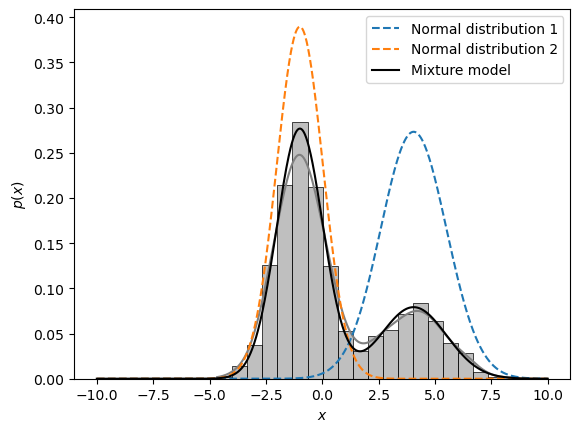

In [5]:
import seaborn as sns
def plot_mixture(x, mean1, std1, mean2, std2, w1, w2): 
    # Plot an histogram of the input data 
    sns.histplot(x, bins=20, kde=True, stat='density', linewidth=0.5, color='gray') 
 
    # Generate points for the x-axis 
    x_ = np.linspace(-10, 10, 1000) 
 
    # Calculate the individual nomral distributions 
    normal1 = norm.pdf(x_, mean1, std1) 
    normal2 = norm.pdf(x_, mean2, std2) 
 
    # Calculate the mixture 
    mixture = w1 * normal1 + w2 * normal2 
 
    # Plot the results 
    plt.plot(x_, normal1, label='Normal distribution 1', linestyle='--') 
    plt.plot(x_, normal2, label='Normal distribution 2', linestyle='--') 
    plt.plot(x_, mixture, label='Mixture model', color='black') 
    plt.xlabel('$x$') 
    plt.ylabel('$p(x)$') 
    plt.legend() 
plot_mixture(Y, mu0[0], std0[0], mu0[1], std0[1], w0[0], w0[1])

## 2. GMM的生成与采样

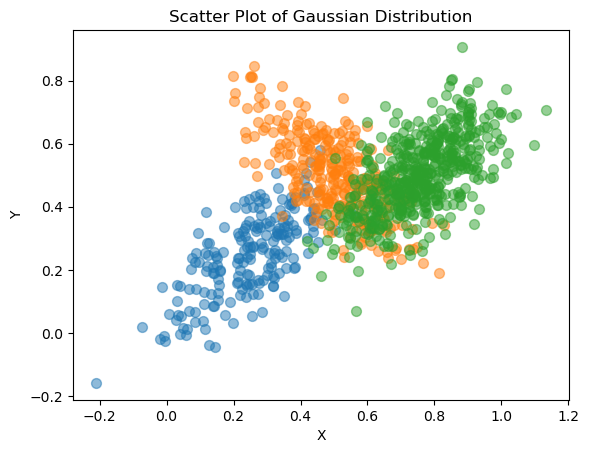

In [6]:
# 生成二维高斯分布N
mu_1 = np.array([0.25, 0.25])  # 均值
sigma_1 = np.array([[0.015, 0.01], [0.01, 0.015]])  # 协方差矩阵
N_1 = np.random.multivariate_normal(mu_1, sigma_1, size=200)

mu_2 = np.array([0.5, 0.5])  # 均值
sigma_2 = np.array([[0.015, -0.01], [-0.01, 0.015]])  # 协方差矩阵
N_2 = np.random.multivariate_normal(mu_2, sigma_2, size=300)

mu_3 = np.array([0.75, 0.5])  # 均值
sigma_3 = np.array([[0.015, 0.01], [0.01, 0.015]])  # 协方差矩阵
N_3 = np.random.multivariate_normal(mu_3, sigma_3, size=500)
# 绘制散布图
plt.scatter(N_1[:, 0], N_1[:, 1], s=50, alpha=0.5)
plt.scatter(N_2[:, 0], N_2[:, 1], s=50, alpha=0.5)
plt.scatter(N_3[:, 0], N_3[:, 1], s=50, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Gaussian Distribution')
# 显示图像
plt.show()

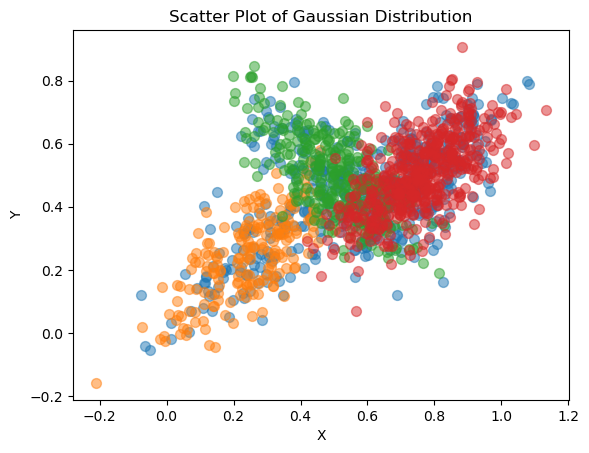

In [8]:
sample_x = []
for i in range(500):
    sample_z = np.random.choice([1, 2, 3], p=[0.2, 0.3, 0.5])
    if sample_z == 1:
        sample_x.append(np.random.multivariate_normal(mu_1, sigma_1))
    elif sample_z == 2:
        sample_x.append(np.random.multivariate_normal(mu_2, sigma_2))
    else:
        sample_x.append(np.random.multivariate_normal(mu_3, sigma_3))

sample_x = np.array(sample_x)
plt.scatter(sample_x[:, 0], sample_x[:, 1], s=50, alpha=0.5)
# 绘制散布图
plt.scatter(N_1[:, 0], N_1[:, 1], s=50, alpha=0.5)
plt.scatter(N_2[:, 0], N_2[:, 1], s=50, alpha=0.5)
plt.scatter(N_3[:, 0], N_3[:, 1], s=50, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Gaussian Distribution')
# 显示图像
plt.show()